Please develop and optimize 3 machine learning models (logistic regression, decision tree and random forest) to predict those who have diabetes (gh >= 6.5%) using Python in a Jupyter notebook. Thereafter, please interpret and compare the fine-tuned models.


The data dictionary may be found at https://hbiostat.org/data/repo/nhgh
The dataset may be found at https://hbiostat.org/data (scroll down to NHANES
glycohemoglobin data and download the nhgh.tsv file)

Your solution may include the following:

 Convert data to a tidy format

 Export to normalized tables in an SQLite3 database

 Use SQL statements (using from within pandas is acceptable) to retrieve the data needed for each visualization

Place your notebook with reproducible results in a public GitHub repository. By reproducible, we mean that when we run all cells in the notebook, the same results should be recreated each time.


We are looking for evidence of the following basic data science skills:

 Idiomatic python

 Jupyter notebooks

 Literate programming

 Experience with version control

 Data processing skills

 Relational database knowledge

 Data visualization skills

 Machine learning knowledge

 Modelling skills

In [ ]:
# Import relevant libraries
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Library version control

# Print version of pandas
#print("Pandas version:", pd.__version__)

# Print version of scikit-learn
#print("Scikit-learn version:", sklearn.__version__)

# Libraries version
# Pandas version: 2.0.3
# Scikit-learn version: 1.2.2

In [ ]:
# Data Preprocessing cell

data = pd.read_csv("nhgh.tsv", sep="\t")

# Handle missing values if any
data.dropna(inplace=True)
data = data.drop(columns = 'seqn')

# Encode categorical variables
label_encoders = {}
for col in ["sex", "re", "tx", "dx", "income"]:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [ ]:
# Split the data into training and testing sets

X = data.drop(columns=["gh"])
y = (data["gh"] >= 6.5).astype(int)  # Binary target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter
logistic_model.fit(X_train_scaled, y_train)

# Evaluate the model's performance
y_pred = logistic_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9373246024321796
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       995
           1       0.54      0.58      0.56        74

    accuracy                           0.94      1069
   macro avg       0.76      0.77      0.76      1069
weighted avg       0.94      0.94      0.94      1069



This cell below is for hyperparameter tuning, which has been all commented due to me not knowing what machines you will be using to running this code

In [ ]:
# This cell is for hyperparameter tuning, which has been all commented due to me not knowing what machines you will be using to running this code

#from sklearn.model_selection import GridSearchCV

## Define the hyperparameter grid
#param_grid = {
#    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
#    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  # Solver options
#}

#grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
#grid_search.fit(X_train_scaled, y_train)

## Print the best hyperparameters
#print("Best Hyperparameters:", grid_search.best_params_)

## Evaluate the best model
#best_model = grid_search.best_estimator_
#y_pred = best_model.predict(X_test_scaled)
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)
#print("Classification Report:")
#print(classification_report(y_test, y_pred))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)

# Evaluate the decision tree model's performance
y_pred_dt = decision_tree_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9204864359214219
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       995
           1       0.44      0.55      0.49        74

    accuracy                           0.92      1069
   macro avg       0.70      0.75      0.72      1069
weighted avg       0.93      0.92      0.92      1069



This cell below is for hyperparameter tuning, which has been all commented due to me not knowing what machines you will be using to running this code

In [ ]:
# This cell is for hyperparameter tuning, which has been all commented due to me not knowing what machines you will be using to running this code

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for decision tree
# param_grid_dt = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Perform grid search
# grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
# grid_search_dt.fit(X_train_scaled, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)

# # Evaluate the best decision tree model
# best_decision_tree_model = grid_search_dt.best_estimator_
# y_pred_dt_tuned = best_decision_tree_model.predict(X_test_scaled)
# accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
# print("Tuned Decision Tree Accuracy:", accuracy_dt_tuned)
# print("Tuned Decision Tree Classification Report:")
# print(classification_report(y_test, y_pred_dt_tuned))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)

# Evaluate the random forest model's performance
y_pred_rf = random_forest_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9373246024321796
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       995
           1       0.54      0.58      0.56        74

    accuracy                           0.94      1069
   macro avg       0.76      0.77      0.76      1069
weighted avg       0.94      0.94      0.94      1069



This cell below is for hyperparameter tuning, which has been all commented due to me not knowing what machines you will be using to running this code

In [ ]:
# # Define the parameter grid for random forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300, 400],
#     'max_depth': [None, 10, 20, 30, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Perform grid search
# grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
# grid_search_rf.fit(X_train_scaled, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)

# # Evaluate the best random forest model
# best_random_forest_model = grid_search_rf.best_estimator_
# y_pred_rf_tuned = best_random_forest_model.predict(X_test_scaled)
# accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
# print("Tuned Random Forest Accuracy:", accuracy_rf_tuned)
# print("Tuned Random Forest Classification Report:")
# print(classification_report(y_test, y_pred_rf_tuned))

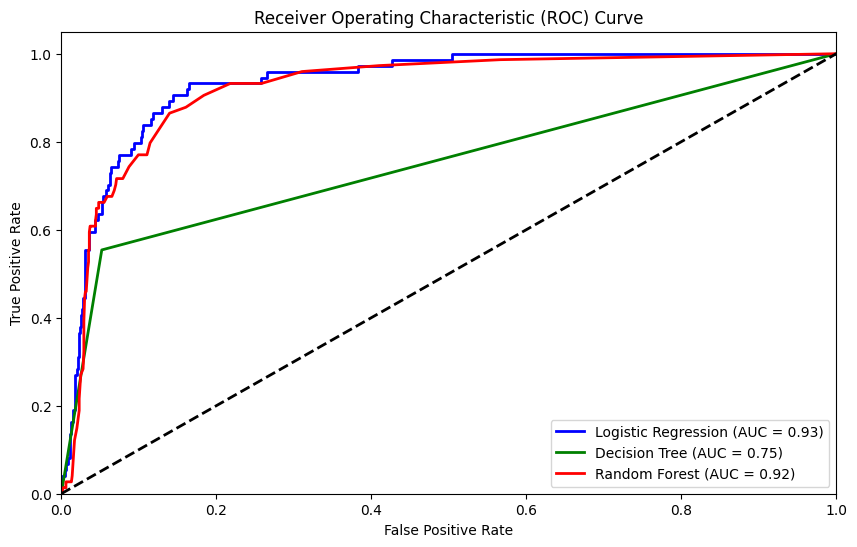

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree_model.predict_proba(X_test_scaled)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test_scaled)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [19]:
# Saving the models in this cell

from joblib import dump


dump(logistic_model, 'logistic_model.joblib')
dump(decision_tree_model, 'decision_tree_model.joblib')
dump(random_forest_model, 'random_forest_model.joblib')


['random_forest_model.joblib']

# SQLite3

In [ ]:
import sqlite3

# Export data to normalized tables in an SQLite3 database
conn = sqlite3.connect("data.db")

# Export data to tables
data.to_sql("data", conn, index=False, if_exists="replace")
X_train.to_sql("X_train", conn, index=False, if_exists="replace")
X_test.to_sql("X_test", conn, index=False, if_exists="replace")
y_train.to_sql("y_train", conn, index=False, if_exists="replace")
y_test.to_sql("y_test", conn, index=False, if_exists="replace")

# Use SQL statements to retrieve the data needed for each visualization
# Example: Retrieve data for logistic regression visualization, decision tree and random forest visualization
logistic_data = pd.read_sql("SELECT * FROM data", conn)
dt_data = pd.read_sql("SELECT * FROM data", conn)
rf_data = pd.read_sql("SELECT * FROM data", conn)

# Close the connection
conn.close()